<a href="https://colab.research.google.com/github/Whatthe-we/AIFFEL_quest_cr/blob/master/%ED%8F%AC%EC%BC%93%EB%AA%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전설의 포켓몬 찾아 삼만리
Main_Quest_CR11

##STEP 0. 설계
---

0. 프로젝트의 목표: 전설의 포켓몬을 분류
- 전체 데이터셋을 밑바닥부터 탐색한다.
- 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리한다.
- 베이스라인 모델을 학습시키고, 처리한 데이터로 성능을 올려본다.
- 탐색적 데이터 분석(**Exploratory Data Analysi=EDA**)을 진행한다.


1. 데이터 살펴보기

  *  kaggle 사이트에 있는 자료 참고
  *  각 feature 별 특징, 관계 파악
  *  결측치 존재 여부 확인
  *  속성, 스탯, 세대별 분포 차이 확인


2. 전설의 포켓몬과 일반 포켓몬 차이 비교

  - 전설의 포켓몬의 Total값  
  - 전설의 포켓몬의 이름


3. 데이터 전처리
  - 이름의 길이가 10 이상일 때
  - 이름에 자주 쓰이는 토큰 추출
  - Type 1 & 2 범주형 데이터 전처리

4. 모델 학습
  - 가장 기본 데이터로 만드는 베이스라인  
  - 의사 결정 트리 모델 학습
  - 피처 엔지니어링 데이터로 학습시키면 얼마나 차이나는지 확인  
  - 의사 결정 트리 모델 다시 학습

5. 비교 모델
  - 비교 모델 학습
  - 베이스라인 모델과 비교 모델 비교하기


6. 회고 및 제출
  - 느낀 점


## STEP 1. 데이터 살펴보기
---

### import library
이번 시간에 사용할 라이브러리를 가져온다.
- numpy, pandas를 통해 2차원 형식의 표 데이터를 다룬다.
- seaborn, matplotlib을 통해 데이터를 그래프로 시각화한다.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('ﾚ(Ⲻⲻ Ⲻ )ﾍ=͟͟͞͞ ')

ﾚ(Ⲻⲻ Ⲻ )ﾍ=͟͟͞͞ 


### Load Data


Pokemon with stats

[https://www.kaggle.com/datasets/abcsds/pokemon?resource=download]

캐글에 있는 포켓몬 게임에 대한 데이터셋을 다운받아 colab에 업로드한다.

In [8]:
file_path = '/content/sample_data/Pokemon.csv'
original_data = pd.read_csv(file_path)
print('ﾚ(Ⲻⲻ Ⲻ )ﾍ=͟͟͞͞ ')

ﾚ(Ⲻⲻ Ⲻ )ﾍ=͟͟͞͞ 


`original_data`에 데이터를 저장한다.

In [9]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


`original_data` 원본 데이터를 담은 변수는 그대로 둔 채,

원본 데이터를 복사한 `pokemon`변수를 새로 만들어 사용한다.

### Date Description

데이터는 총 800행, 13열로 이루어져 있다.

이를 통해 포켓몬은 800마리, 각 포켓몬을 설명하는 특성(feature)은 13개인걸 확인할 수 있다.

In [10]:
# 전설 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [11]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


###Check the Target

타겟은 **Legendary (전설의 포켓몬인지 아닌지의 여부)이다.**

  - Legendary == True 값을 가지는 전설 포켓몬 데이터셋은 legendary 변수에 저장한다.

  - Legendary == False 값을 가지는 일반 포켓몬 데이터셋은 ordinary 변수에 저장한다.






이를 통해 800개 중 **65개**의 데이터만이 전설의 포켓몬인 것을 확인하였다.
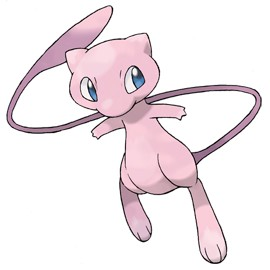

(희귀하다...!)

### Missing Value Check

In [12]:
pokemon.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


Type 2 컬럼에서 총 **386개의 결측치**가 발견되었다.

이유를 알아보기 위해 columns을 살펴보겠다.


In [13]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

 ### All Columns

- `#` : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가짐
-`Name` : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다름. (unique)
-`Type 1` : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력
-`Type 2` : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가짐
-`Total` : 전체 6가지 스탯의 총합
-`HP` : 포켓몬의 체력
-`Attack` : 물리 공격력
-`Defense` : 물리 공격에 대한 방어력
-`Sp. Atk` : 특수 공격력
-`Sp. Def` : 특수 공격에 대한 방어력
-`Speed` : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정
-`Generation` : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다
-`Legendary` : 전설의 포켓몬 여부

## Pokémon Type

포켓몬의 속성을 확인한다.
무작위로 두 마리의 포켓몬을 살펴보자

In [14]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를,

 8번 포켓몬인 Wartortle은 Water 속성 단 한 가지만 가지는 것을 알 수 있다.

In [15]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지의 속성이 들어가 있다.
Type 2에 한 가지 더 많은것을 확인하기 위해 차집합을 사용하겠다.

In [16]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

둘의 차집합은 바로 NaN 값이다.

따라서 NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있음을 알 수 있다.

포켓몬들의 모든 Type을 types 변수에 저장한다.

In [17]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Grass', 'Dark', 'Fire', 'Steel', 'Flying', 'Electric', 'Normal', 'Water', 'Ghost', 'Bug', 'Psychic', 'Rock', 'Poison', 'Fairy', 'Ice', 'Ground', 'Dragon', 'Fighting']


###Type 1 데이터 분포 plot
---

일반 포켓몬과 전설의 포켓몬 속성 분포를 각각 확인한다.

전설의 포켓몬 수가 매우 적은 **불균형 데이터**이기 때문에, 그래프로 시각화한다.

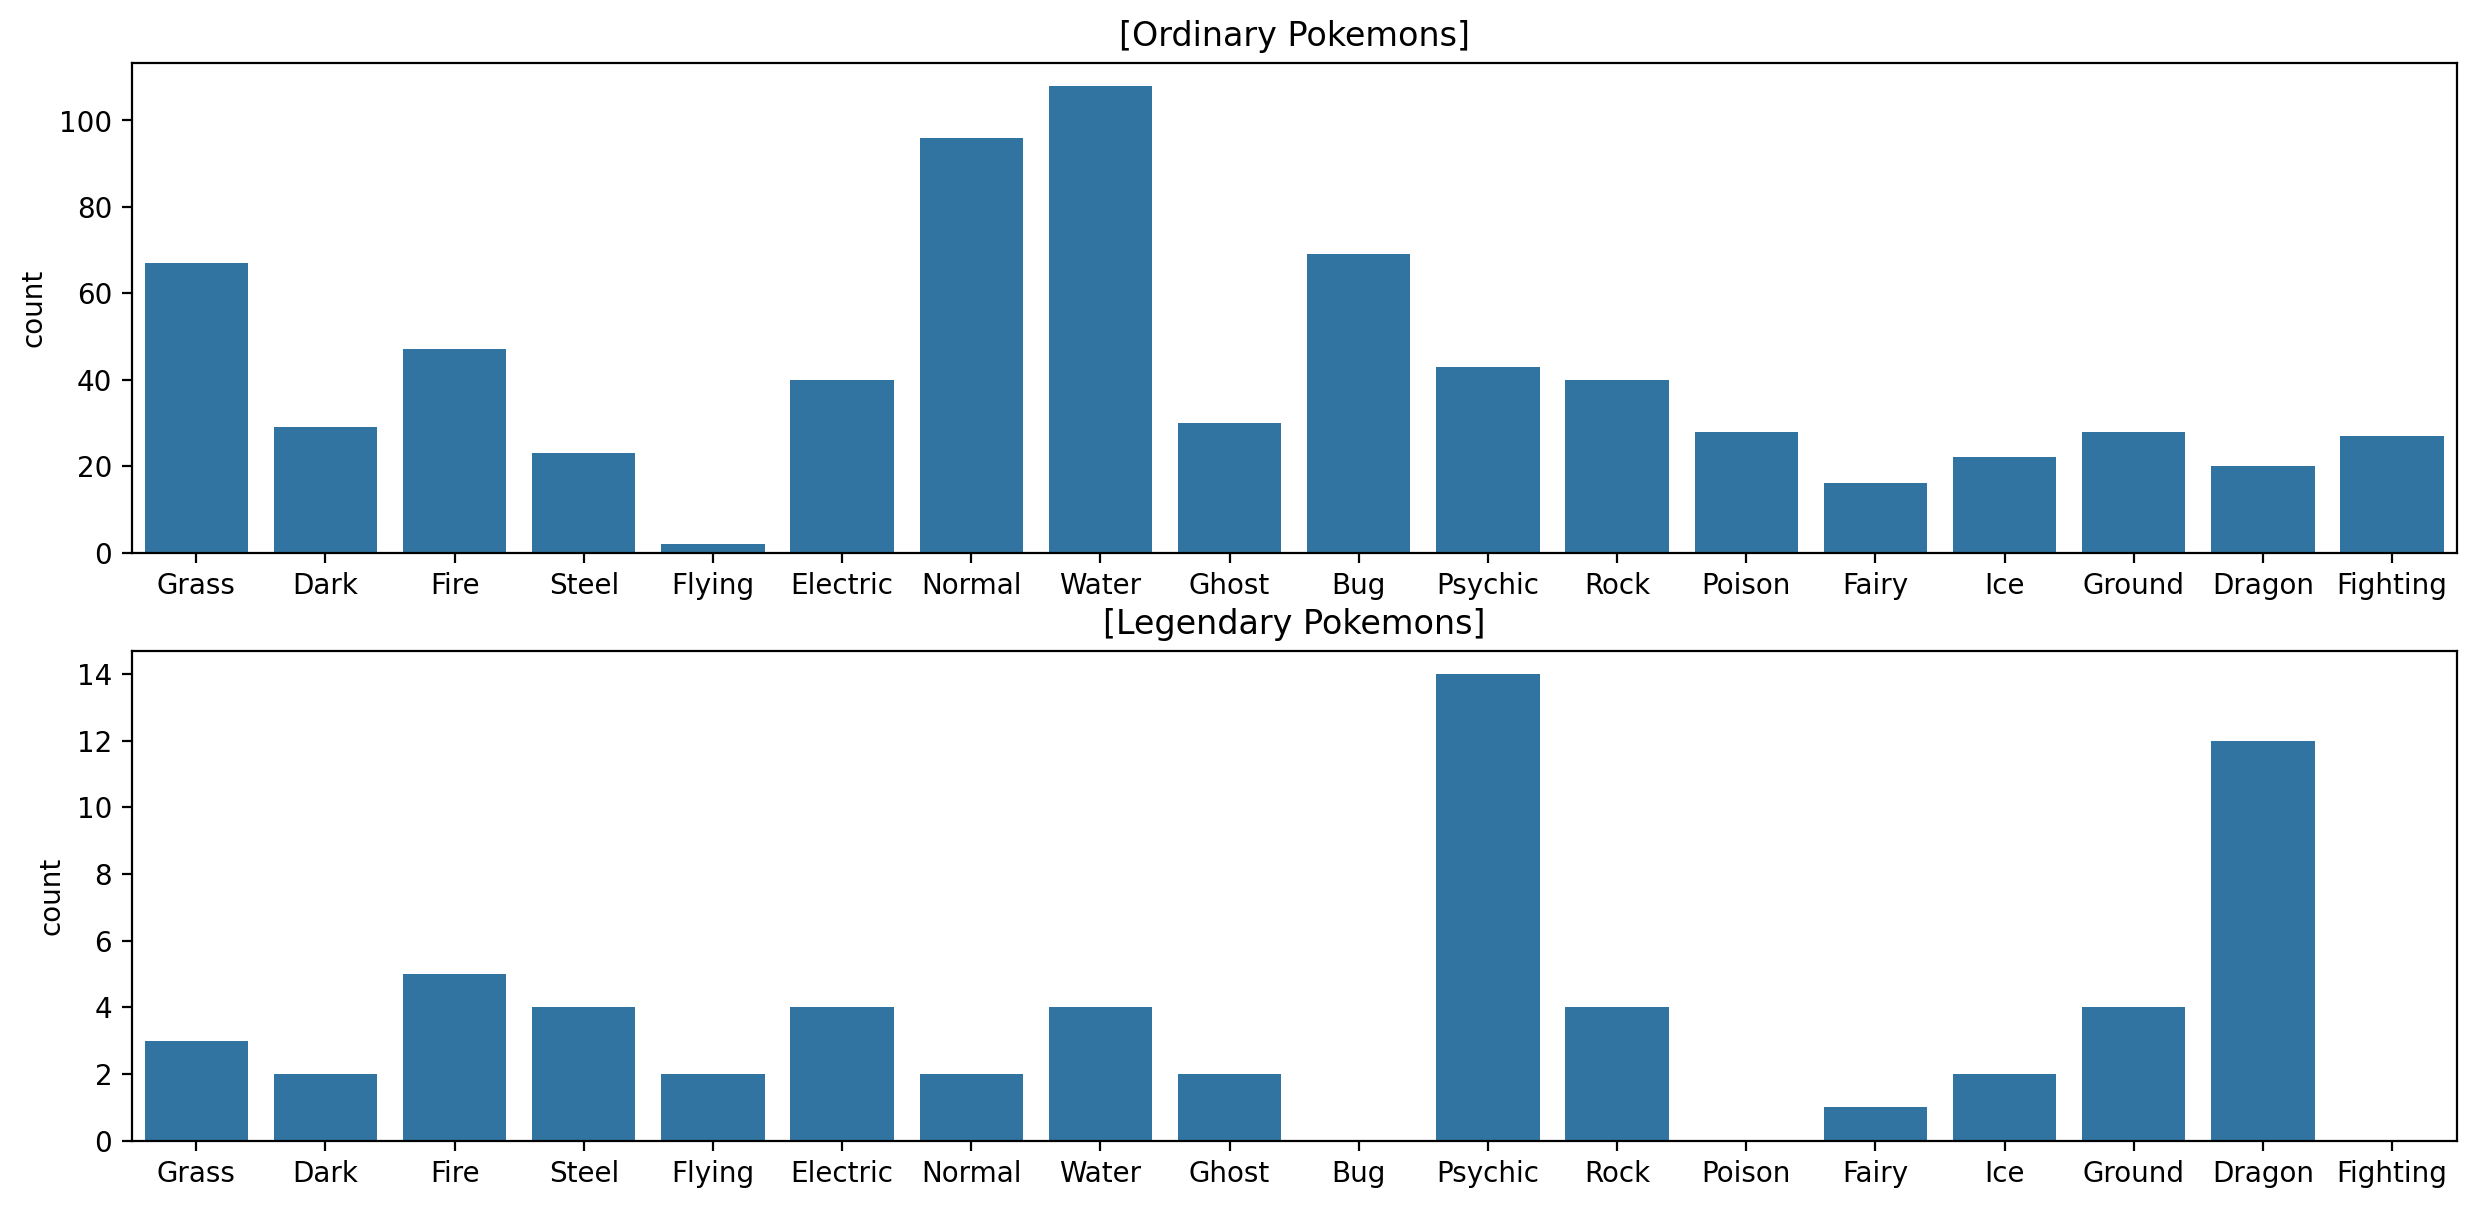

In [19]:
plt.figure(figsize=(15, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

그래프를 통해

일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많다.

그리고 전설의 포켓몬에는 없는 속성도 존재한다.

는 것을 알 수 있다.

In [28]:
#Type 1 pivot table
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


pivot table로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인해보았다.
sort_value를 활용해 높은 것부터 낮은 순으로 정렬한다.

Legendary 비율이 가장 높은 속성은 Flying으로, 50%이다.
날아다니는 포켓몬은 꽤 높은 비율로 전설의 포켓몬임을 알 수 있다.

###Type 2 데이터 분포 plot
---
Type 2에는 NaN(결측값)이 존재했다.
Countplot을 그릴 때는 결측값은 자동으로 제외된다.


<ipython-input-30-139453c43f14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type 2', data=ordinary, palette='viridis')
<ipython-input-30-139453c43f14>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type 2', data=legendary, palette='viridis')


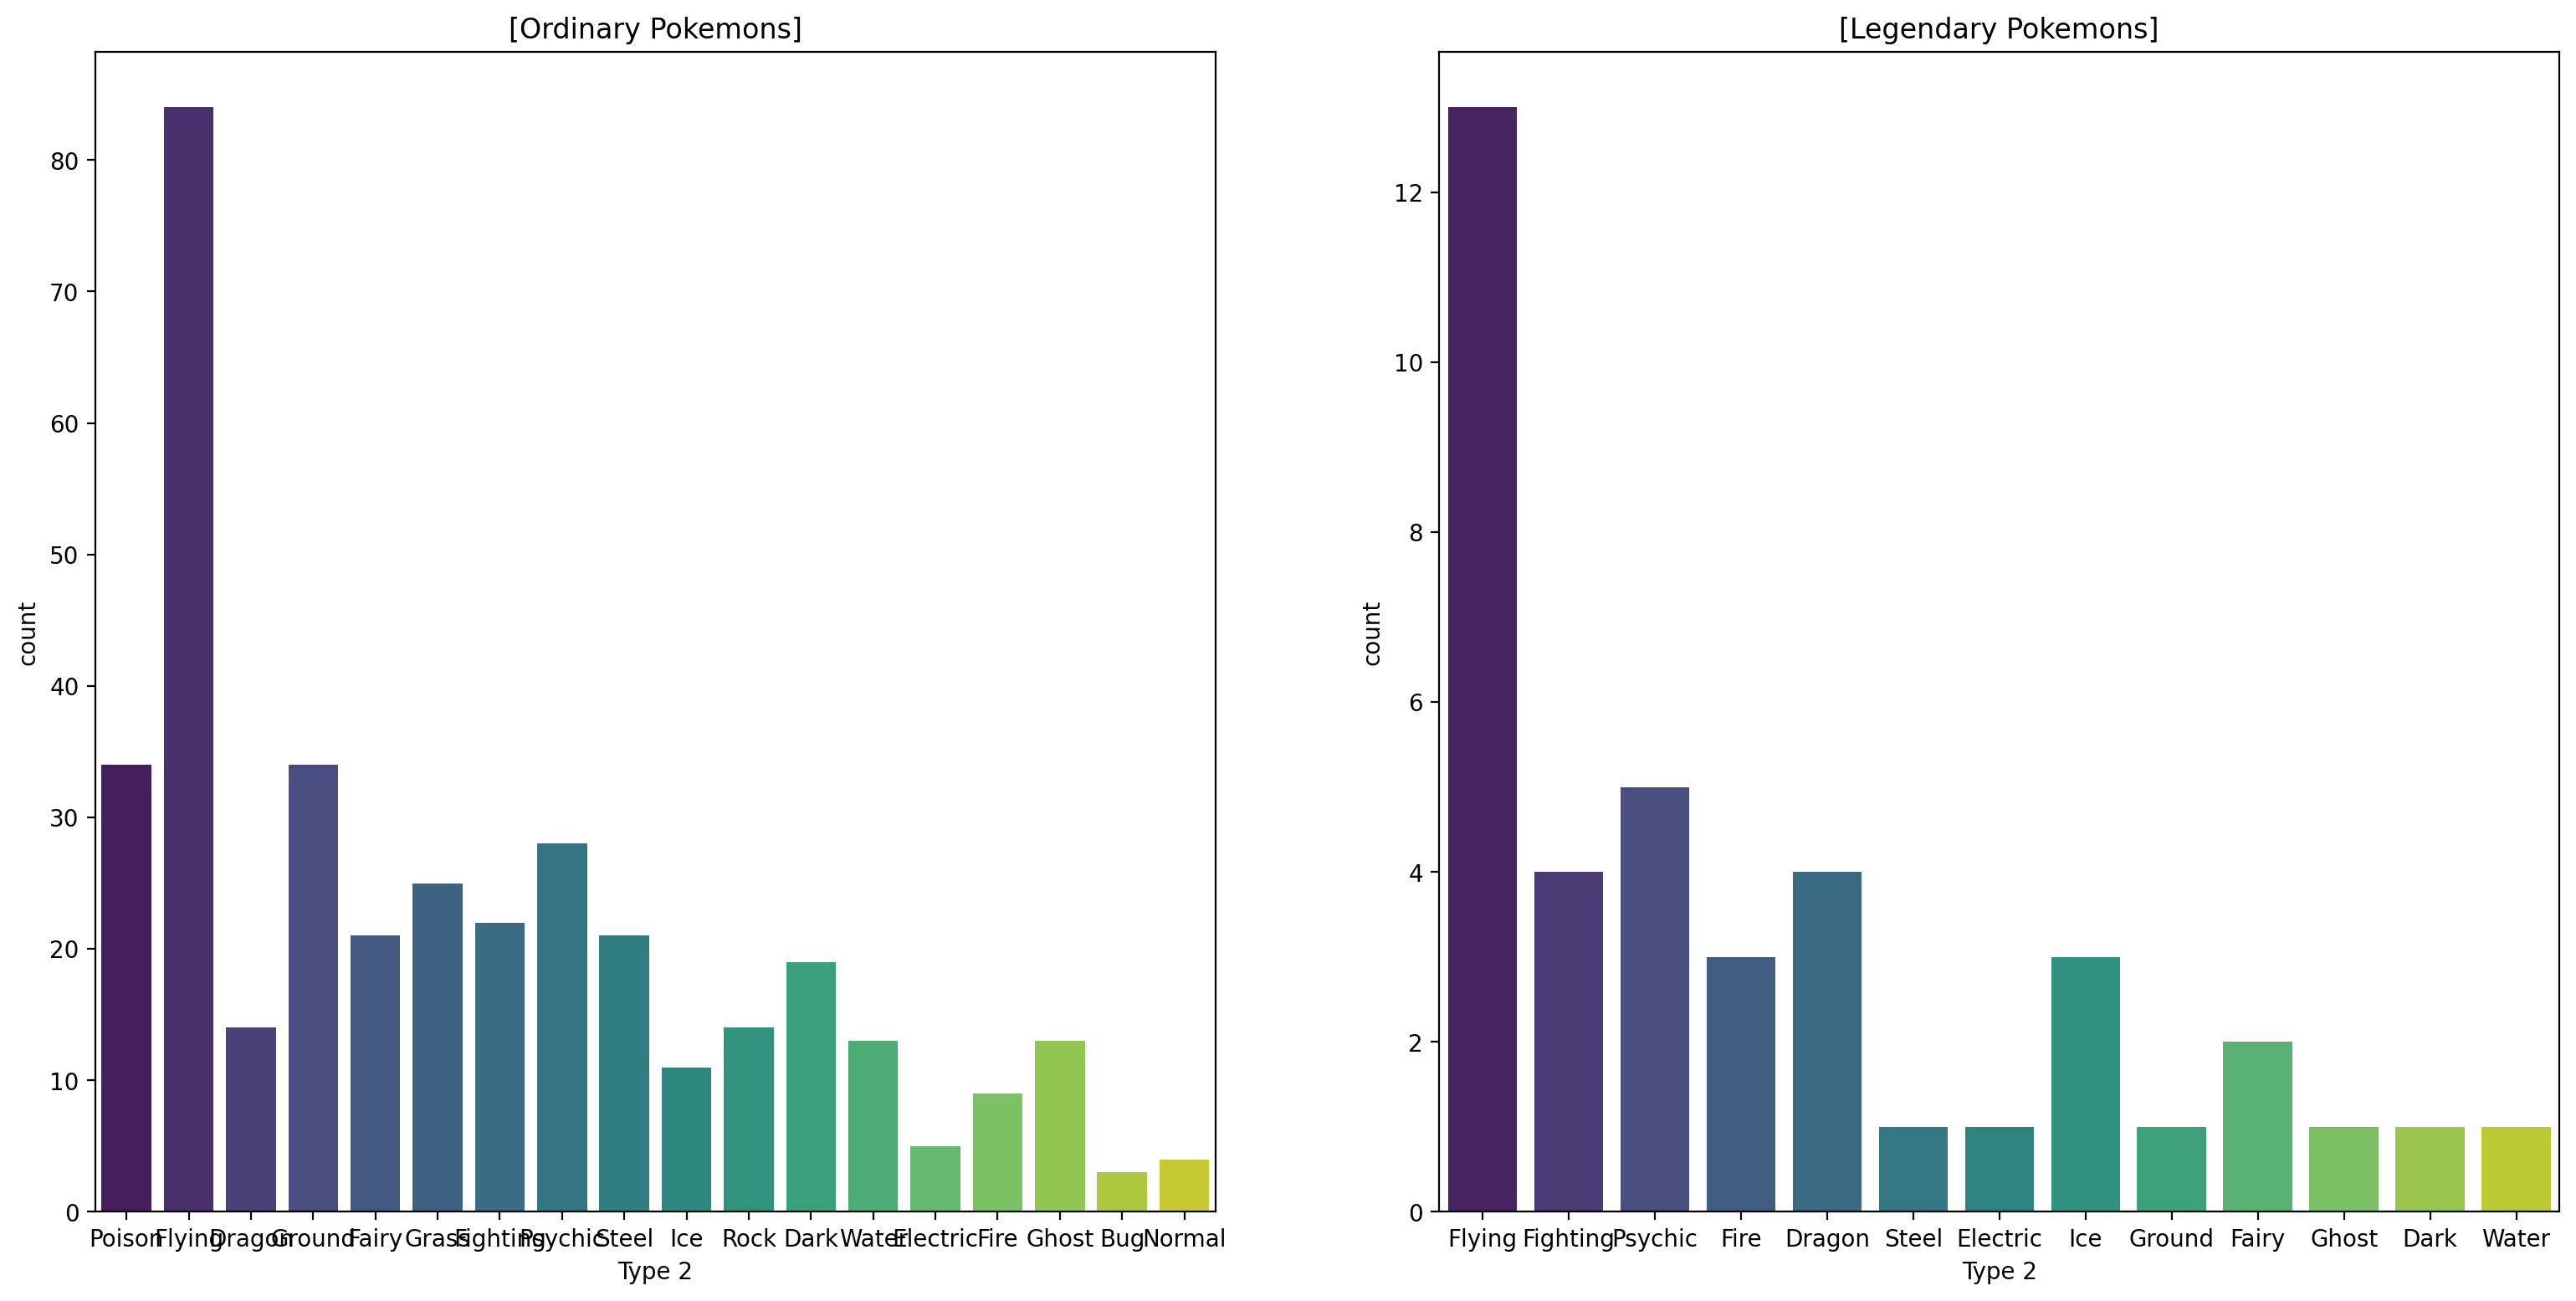

In [30]:
plt.figure(figsize=(19, 9))

plt.subplot(1, 2, 1)
sns.countplot(x='Type 2', data=ordinary, palette='viridis')
plt.title("[Ordinary Pokemons]")

plt.subplot(1, 2, 2)
sns.countplot(x='Type 2', data=legendary, palette='viridis')
plt.title("[Legendary Pokemons]")

plt.show()

와우.

Type 2 또한 일반 포켓몬과 전설의 포켓몬 분포 차이가 보인다.
Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없다.


In [33]:
#Type 2 pivot table
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높다.

### Total : 모든 스탯의 총합
---
데이터셋에서 포켓몬은 총 6가지의 스탯 값을 가진다.

포켓몬 데이터의 Total 컬럼은 이 6가지 속성값의 총합이다.

모든 스탯의 종류를 stats라는 변수에 저장한다.

In [34]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

실제로 6개 스탯의 총합과 데이터에 제공된 Total값이 맞는지 확인한다.

In [35]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


첫 번째 포켓몬에 대해서 Total값이 318로 일치하는 것을 확인하였다.
이제 전체 포켓몬의 Total값이 stats의 총합과 일치하는지 확인해보자.

In [36]:
matching_pokemon_count = (pokemon['Total'] == pokemon[stats].sum(axis=1)).sum()
# 포켓몬마다 가로 방향으로 더해야 하기 때문에 axis=1이 들어감
print("Total과 stats 합이 일치하는 포켓몬의 수:", matching_pokemon_count)

Total과 stats 합이 일치하는 포켓몬의 수: 800


### Total값에 따른 분포 plot

Total 값과 Legendary 는 어떤 관계가 있을지 확인한다.

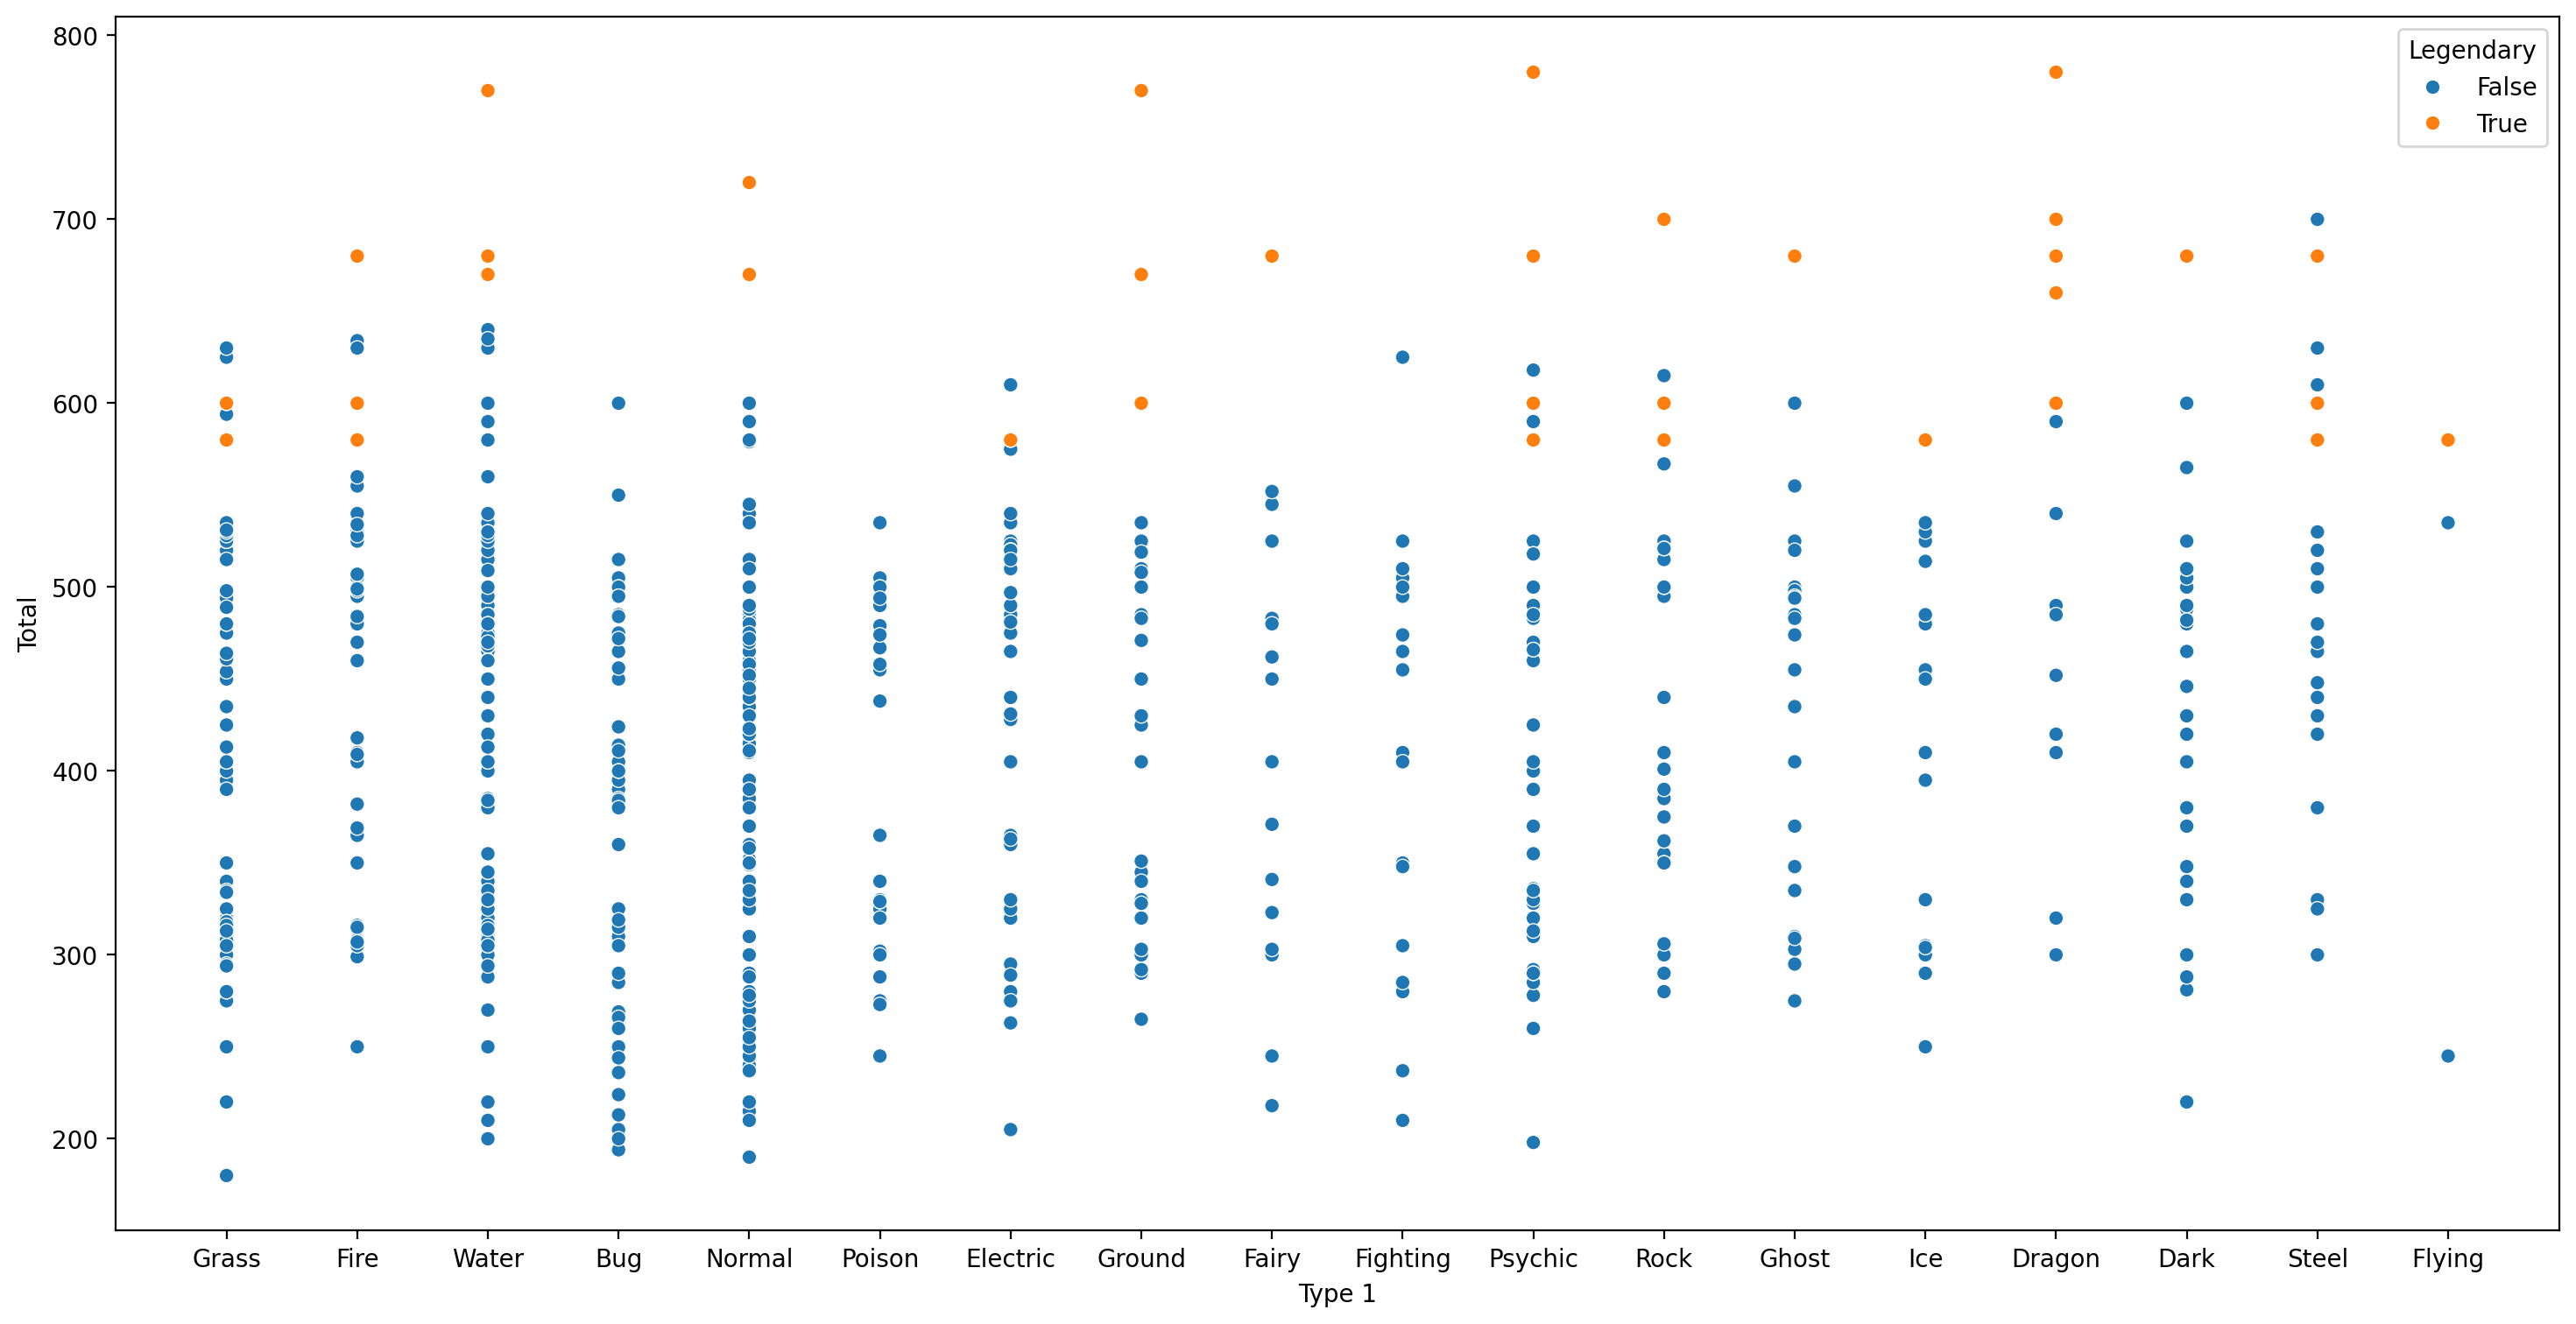

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 9)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

전설의 포켓몬의 Total값이 높은 것으로 보아

전설의 포켓몬이 킹왕짱 쎄다는 것을 알 수 있다.

### 세부 스탯
---
세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

각각의 스탯 값이 어떻게 분포되어 있는지 subplot으로 한번에 확인해보자.

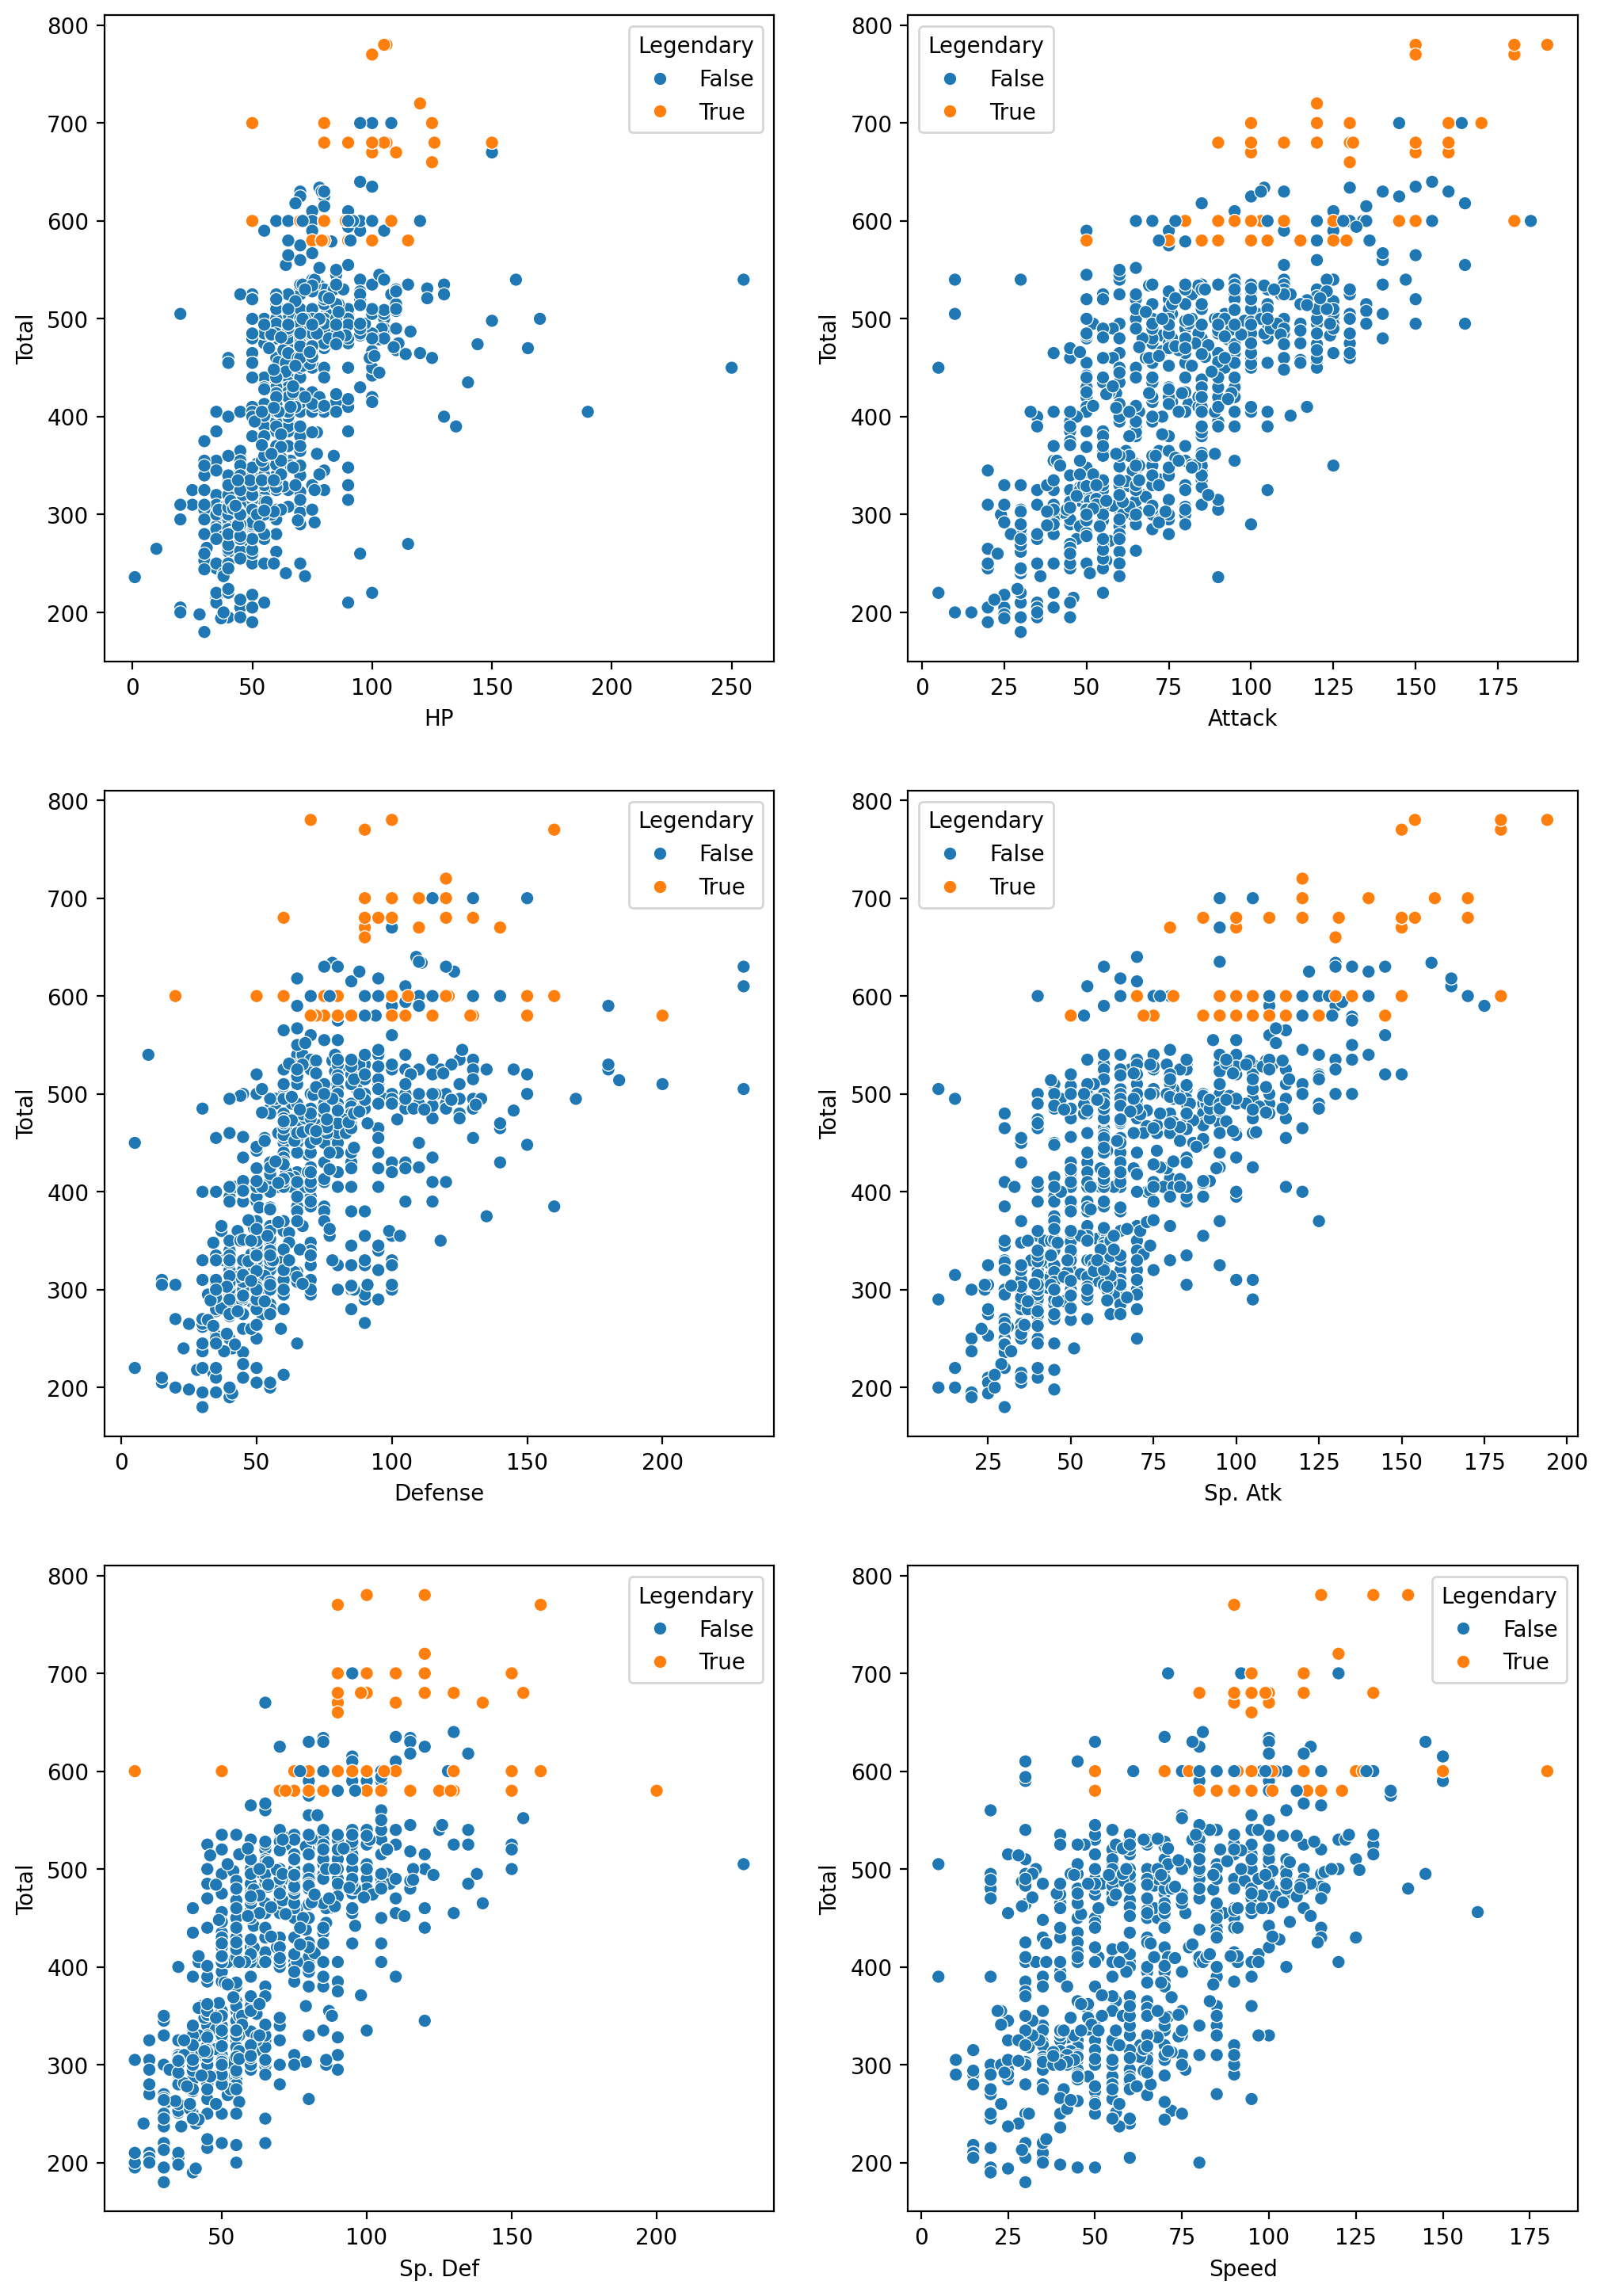

In [40]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

각각의 스탯을 분석한 결과:

**HP, Defense, Sp. Def**

전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있다.

그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다. (ex. 방어형, 공격형 등)


**Attack, Sp. Atk, Speed**

이 세 가지 스탯은 Total과 거의 비례한다.
전설의 포켓몬이 각 스탯의 최대치를 차지하고 있다.

### Generation : 포켓몬의 세대
---
Generation은 각 포켓몬의 "세대"로, 현재 데이터셋에는 1~6세대의 포켓몬이 존재한다.

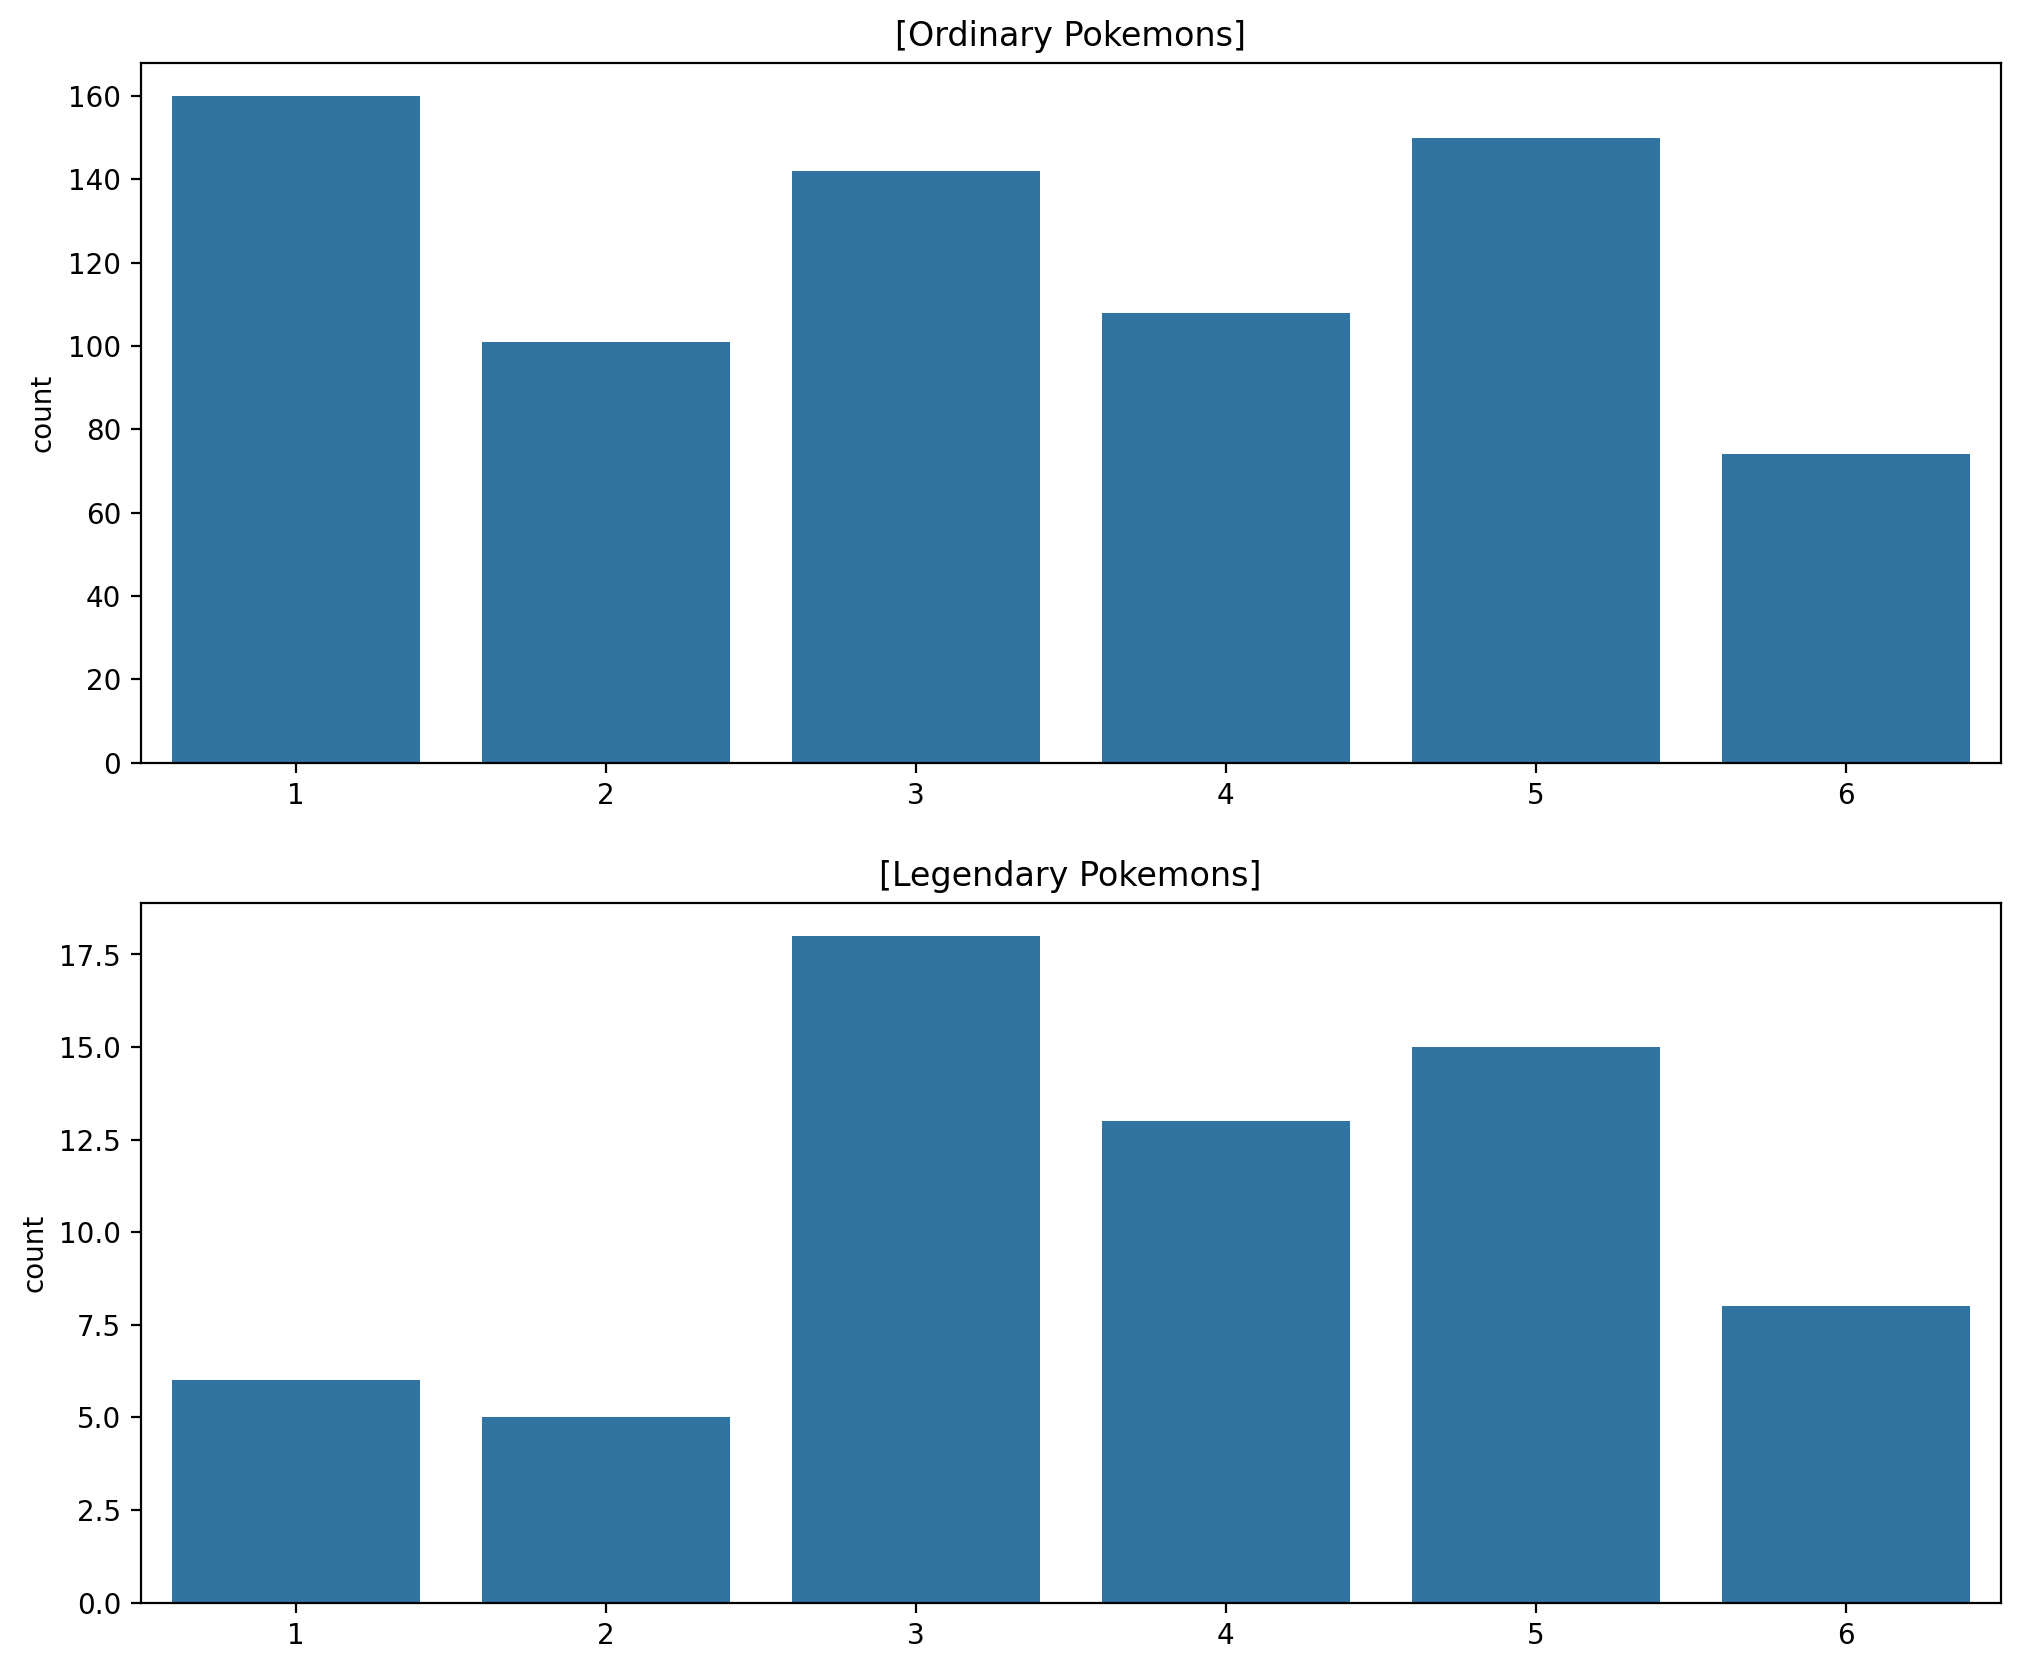

In [42]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

전설의 포켓몬은 1, 2세대에는 많지 않았으며,

 3세대부터 많아졌다가, 6세대에 다시 줄어든 것을 확인할 수 있다.


# STEP 2. 전설의 포켓몬과 일반 포켓몬 차이 비교
---
우리의 목표는 전설의 포켓몬을 일반 포켓몬에서 분류해 내는 것이다.٩(˙ ˆ ˙ )۶

지금까지 각 컬럼의 데이터를 확인했으니

legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 세분화해서 분석해 보자.

### 전설의 포켓몬의 Total 값
먼저 전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인


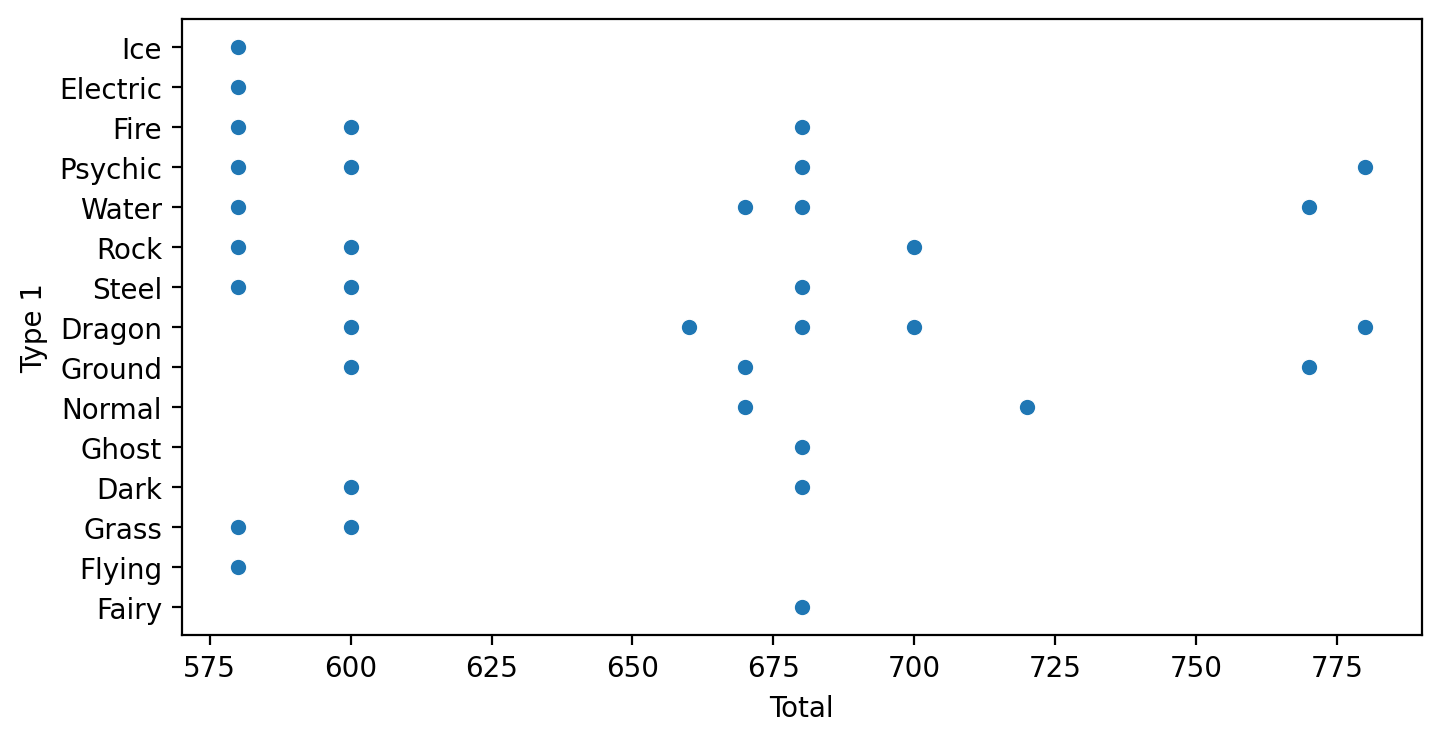

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

전설의 포켓몬들이 특정한 값(600 등)에 몰려있다는 것을 확인할 수 있다.

전설의 포켓몬들이 가지는 Total 값들의 집합을 확인해 보자.

In [44]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


9가지 값밖에 존재하지 않는다는 것을 확인하였다.

이를 그래프로 나타내면

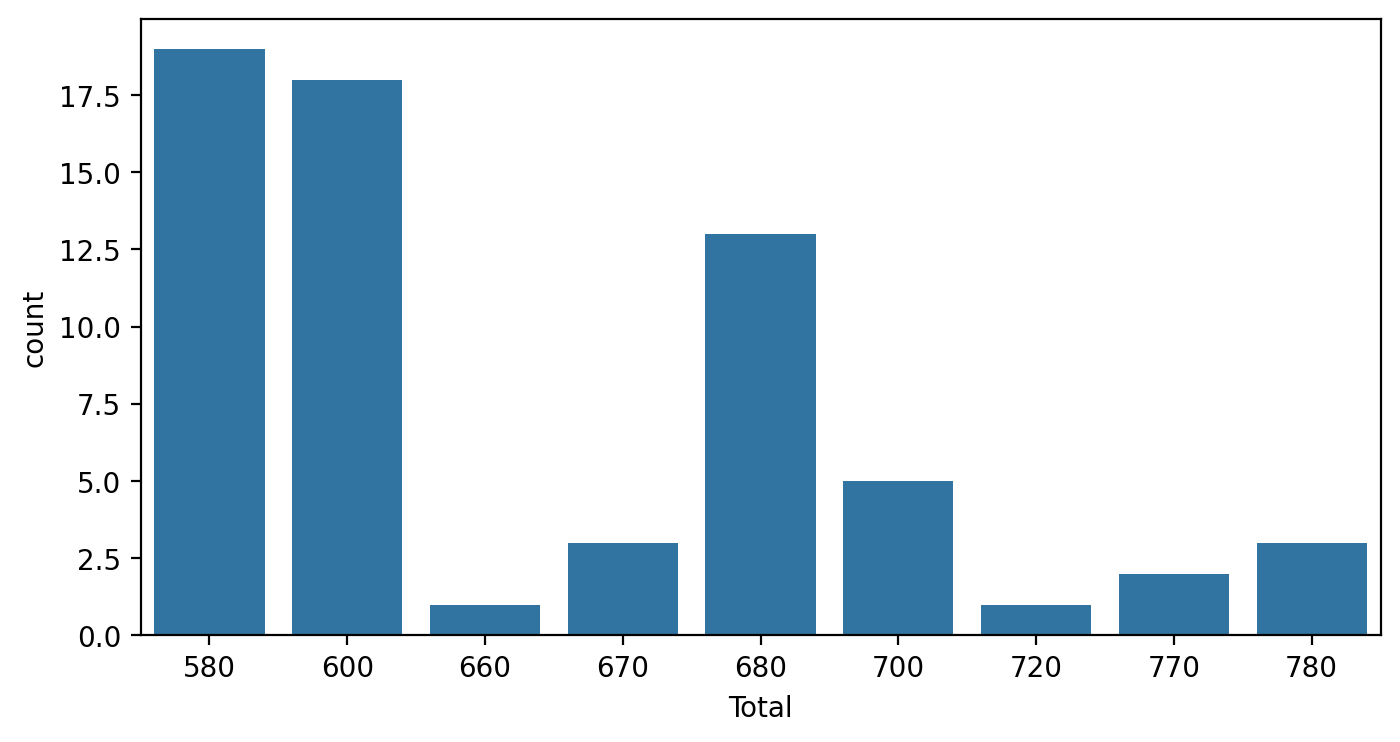

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [46]:
round(65 / 9, 2)

7.22

65마리의 전설의 포켓몬이 9개의 Total값만 가진다는 것은

약 **7.22**마리끼리는 같은 Total 스탯 값을 가진다는 의미와 같다.

Ordinary 포켓몬은 어떤지 확인해 보자.

In [47]:
ordinary_total_set = set(ordinary['Total'])
print(ordinary_total_set)

{514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 180, 700, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510}


In [50]:
ordinary_total_set_size = len(ordinary_total_set)
print(ordinary_total_set_size)

195


In [49]:
round(735 / 195, 2)

3.77

일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리

일반 포켓몬은 **3.77**마리만 같은 Total 스탯 값을 갖는다.

❤ 요약

- Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 된다.

- 전설의 포켓몬의 Total값은 다양하지 않다.

- 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미친다.

- 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다. ex) 680, 720, 770, 780

  결론: **Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼**

### 전설의 포켓몬의 이름
전설의 포켓몬들의 이름을 보면, 특정 단어가 들어가 있는 이름, 또는 긴 이름을 가진 경우가 많다.
*(그래야 멋있음)*


1) 특정 단어

먼저 특정 단어가 들어가 있는 이름이 많은지 확인해보자.

In [51]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


이름들이 비슷한 경향을 띄는 것을 볼 수 있다.

- MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem" 등의 포켓몬은 비슷한 이름을 가진 포켓몬 다수 존재

In [52]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


- forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우도 존재

2) 긴 이름

데이터셋에 이름 길이 컬럼을 생성해서 비교해보겠다.

legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만든다.

파이썬 람다(lambda) 기능을 사용해 행마다 이름의 길이를 구하고, 이를 "name_count" 칼럼에 넣어준다.

In [55]:
# legendary 포켓몬의 데이터에 'name_count' 값을 추가
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [56]:
# ordinary 포켓몬의 데이터에 'name_count' 값을 추가
ordinary['name_count'] = ordinary['Name'].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


만들은 name_count 컬럼의 특징을 그래프로 확인해보겠다.

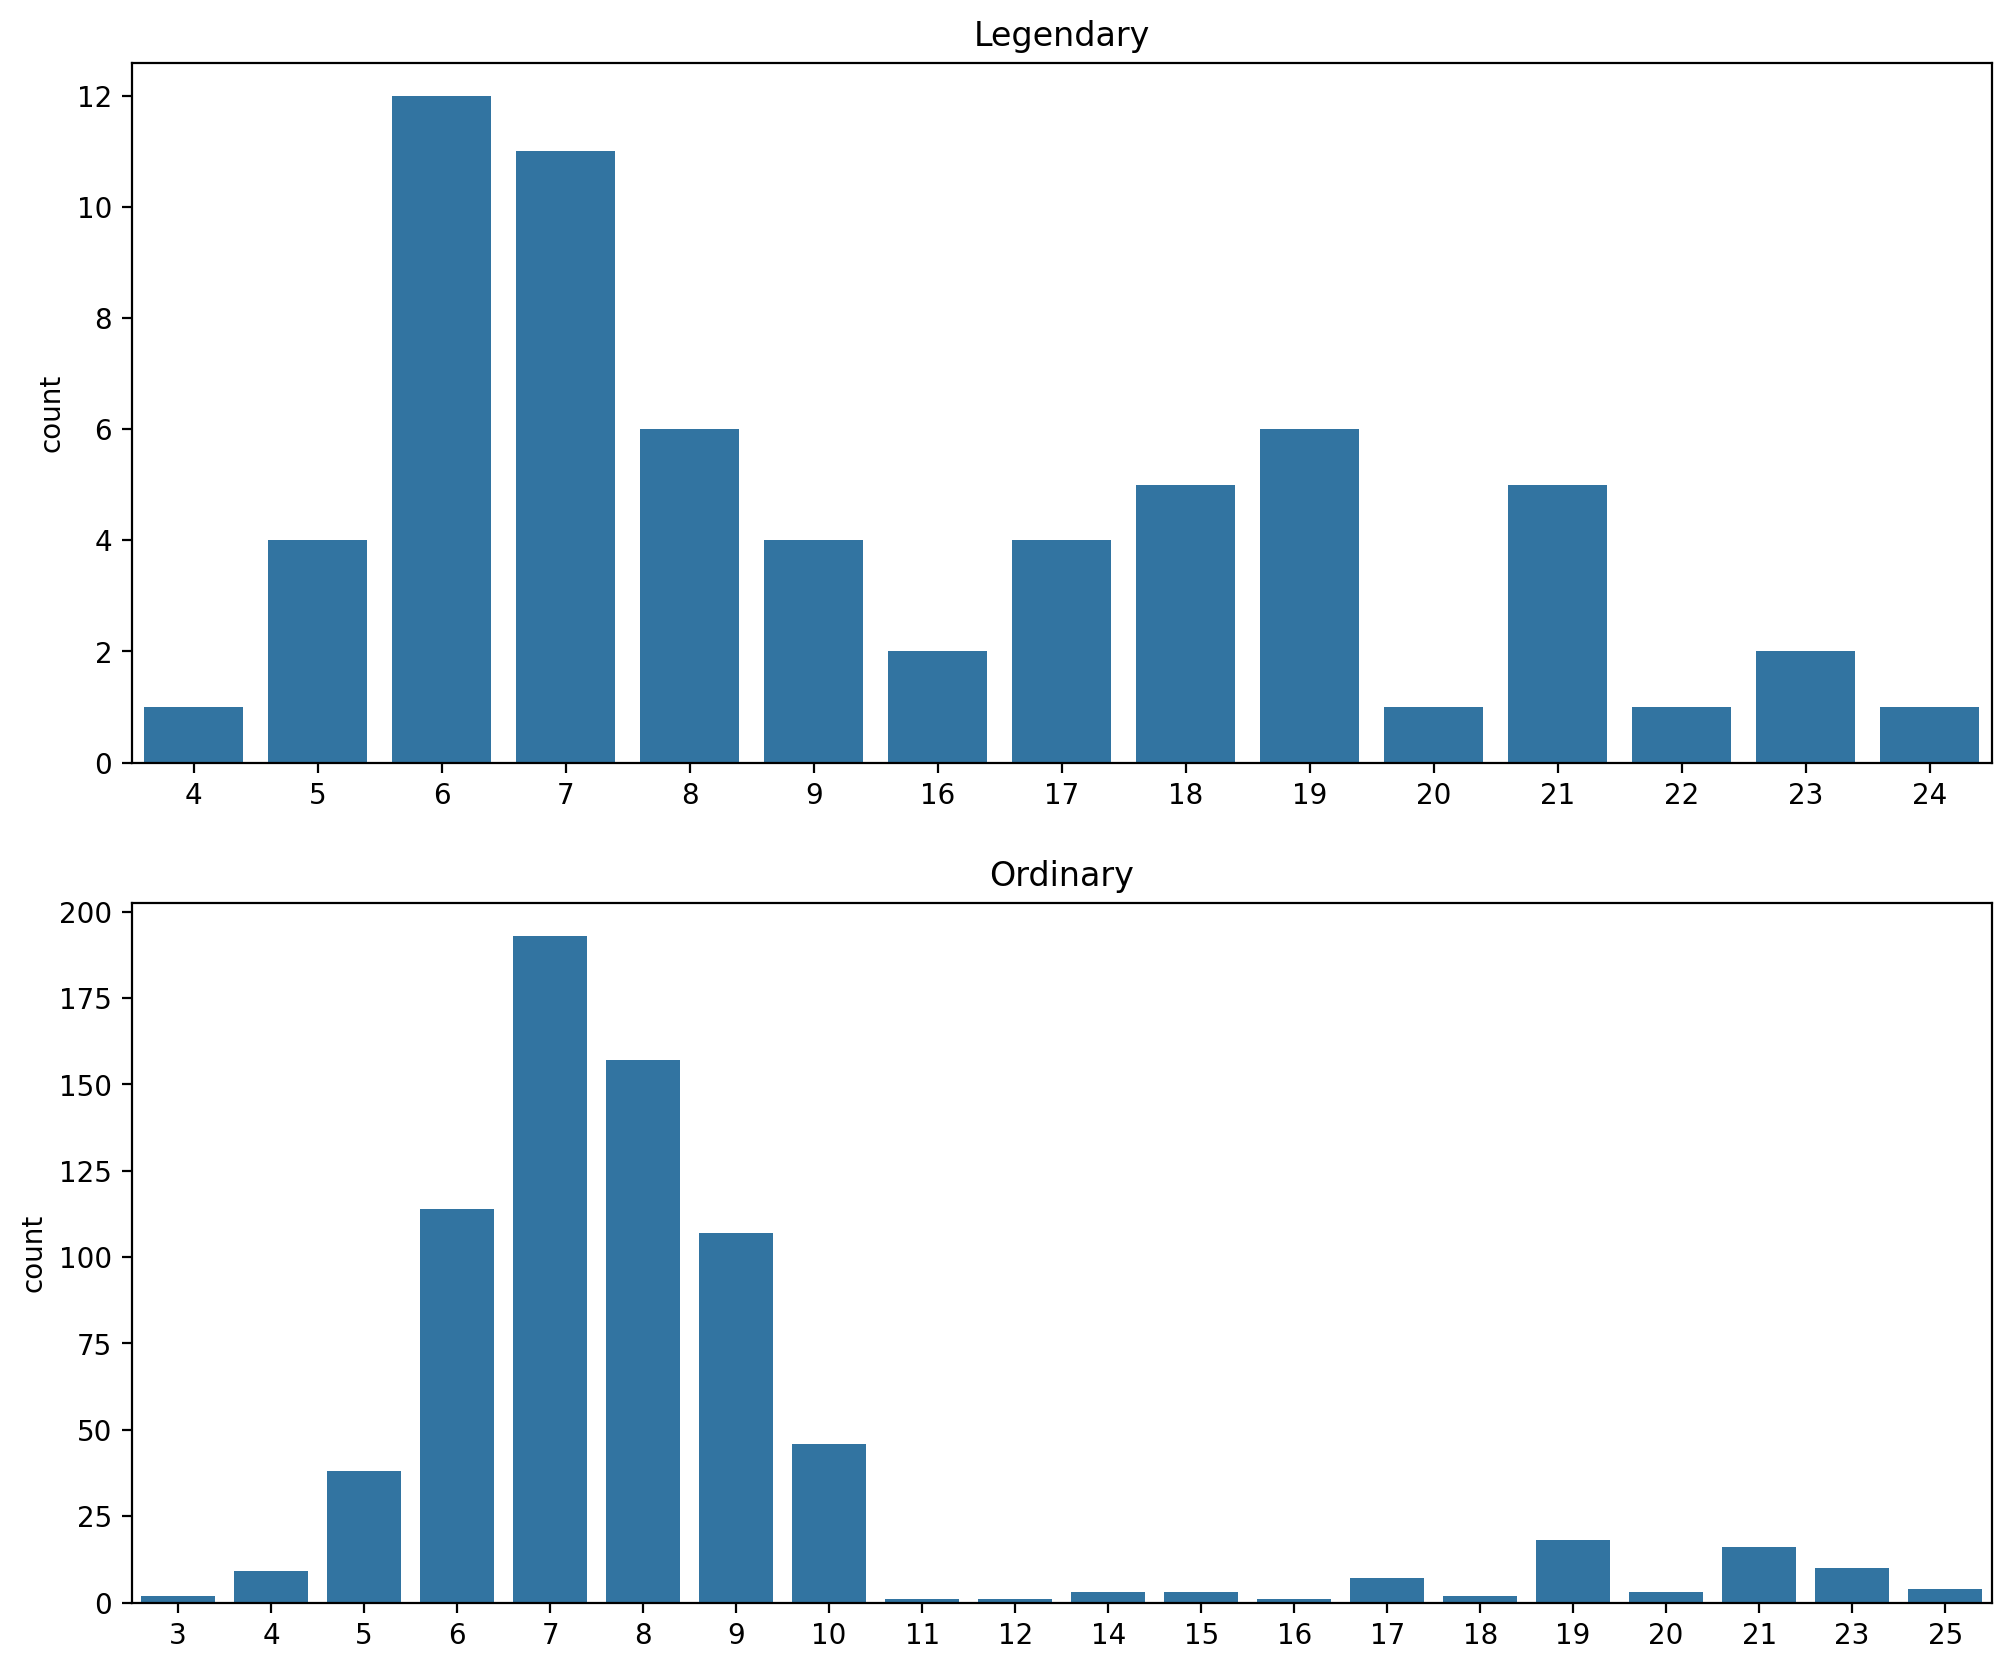

In [57]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

시각적으로 확인할 수 있듯이, 전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면,

일반 포켓몬은 10 이상 길이를 갖는 이름의 빈도가 낮다.

전설의 포켓몬, 일반 포켓몬의 이름이 10 이상일 확률을 각각 확인해보자.

In [58]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [59]:
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


41%, 16% 의 큰 차이를 보여주었다.

❤ 요약

- 전설의 포켓몬에서 높은 빈도를 보이는 이름이 존재
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높음

# STEP 3. 데이터 전처리

지금까지 수행한 EDA 결과에 따라 이름 컬럼을 모델이 연산할 수 있는 형태로 전처리한다.

이름에 관해서 두 가지를 중점적으로 처리할 것이다.
1. **이름의 길이** : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. **토큰 추출** : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 **원-핫 인코딩**(One-Hot Encoding)으로 처리


### (1) 이름의 길이가 10 이상인가 아닌가
---
이름의 길이를 확인할 수 있는 name_count 컬럼을 생성한다.
아까와 같지만, 이번에는 전체 데이터 pokemon 데이터 프레임에 생성한다.

In [60]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성한다.

In [61]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


전설의 포켓몬을 분류하는 데에 이름의 길이값 자체를 가진 name_count 컬럼이 더 유리할지, 혹은 long_name이 더 유리할지는 아직 모르기 때문에

모델을 학습시킬 때에는 두 가지를 모두 활용해 볼 것이다.

### (2) 토큰 추출
  전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만든다.

  추출 전 앞서, 이름에 대해 먼저 알아보겠다.

  포켓몬의 이름은 총 4가지 타입으로 나뉜다.

1. 한 단어면 (ex. Venusaur)
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 (ex. VenusaurMega Venusaur)
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 (ex. CharizardMega Charizard X)
4. 알파벳이 아닌 문자를 포함하는 경우 (ex. Zygarde50% Forme)


이 중 먼저 '**알파벳이 아닌 문자'를 포함하는 경우**를 **isalpha 함수**를 사용하여 처리한다.

알파벳이 아닌 문자를 포함하는 이름을 걸러내고 싶은데,

여기서 주의할 점은 이름에 띄어쓰기가 있는 경우에도 isalpha() = False로 처리된다는 점이다.

따라서 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, **띄어쓰기를 빈칸으로 처리**해서 확인하겠다.

In [81]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion,True


In [83]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


name_isalpha 컬럼이 생성되었다.

다음으로 알파벳이 아닌 다른 문자가 이름에 포함된 것들에 어떤 것들이 있는지 확인한다.

In [84]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(0, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


9마리가 있는 것을 확인할 수 있다.

적은 숫자이므로 적당히 **replace 함수를 사용**해 합리적으로 바꿔주겠다.

In [85]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,NidoranX,True
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,NidoranY,True
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,True
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,MrMime,True
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,PorygonTwo,True
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,HoOh,True
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr,True
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,PorygonZ,True
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,ZygardeForme,True


In [86]:
# 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda x: x.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


name_isalpha 컬럼이 False인 컬럼이 하나도 없다.

이는 모든 이름이 알파벳으로만 이루어졌음을 뜻한다.

### 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기

이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있다.

**정규표현식**(RegEx: Regular Expression) 이라는 기법을 사용하여 문자열을 처리한다.

이를 사용하기 위해 re 패키지를 import 한다.

In [87]:
import re

In [90]:
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

이름을 공백을 기준으로 split 함수로 쪼갠다.

[A-Z][a-z]* 정규표현식을 사용해 토큰화하는 함수를 만들었다.

이를 이제 전설의 포켓몬 데이터셋에 적용시키겠다.


In [91]:


all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

중복을 제외하고 총 65개의 토큰이다.

여기서 많이 사용된 토큰을 collection 패키지를 사용해 추출해보겠다.

In [92]:
from collections import Counter

In [93]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

전설의 포켓몬 이름에는 Forme가 15번이나 쓰였고, 진화를 했을 때 붙는 이름인 Mega도 6번 쓰였다.

전체 65마리밖에 되지 않는 전설의 포켓몬 중 저 정도 횟수라면 높은 비율이다.

마지막으로 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 생성하겠다.

In [95]:
for token, _ in most_common:
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


이름에 맞게 True 또는 False가 처리된 것을 확인할 수 있다.


이제 전설의 포켓몬이 많이 가지는 Forme와 같은 토큰의 컬럼 값이 True라면 그 포켓몬은 전설의 포켓몬일 확률이 높다고 판단할 수 있다.

❤ 요약
- 문자열로 구성된 이름을 전처리를 통해 True, False의 부울 데이터로 변환

###(3) Type1 & 2 범주형 데이터 전처리

다음과 같은 규칙으로 범주형 데이터를 전처리하겠다.

18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)한다.
두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 한다.

In [97]:
# One-Hot Encoding
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Grass,Dark,Fire,Steel,Flying,Electric,Normal,Water,Ghost,Bug,Psychic,Rock,Poison,Fairy,Ice,Ground,Dragon,Fighting
0,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,Fire,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


 Type별로 원-핫 인코딩이 된 걸 확인할 수 있다.

# STEP 4: 모델 학습
---
###가장 기본 데이터로 만드는 베이스라인





원본 데이터 original_data를 사용하여 베이스라인 모델에 넣어볼 것이다.
그 전 문자열 데이터를 빼준다.

In [100]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

의미 없는 컬럼 #,

문자열 데이터인 Name, Type 1, Type 2 ,

target 데이터인 Legendary를 제거한다.

In [101]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [102]:
target = 'Legendary'

모델에 바로 넣어줄 수 있도록 X 변수에 features 컬럼에 해당하는 데이터를 담는다.

In [103]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


y 변수에도 target 컬럼에 해당하는 데이터를 담는다.

In [104]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


마지막으로 sklearn.model_selection 모듈 안의 **train_test_split 함수**를 사용하여

훈련 데이터와 학습 데이터로 분리한다.

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [ ]:
학습 데이터에는 640개의 데이터가, 테스트 데이터에는 160개의 데이터가 들어간 것을 확인하였다.

이제 모델을 학습시키자!

### 의사 결정 트리 모델 학습시키기



In [106]:
from sklearn.tree import DecisionTreeClassifier
print('ﾚ(Ⲻⲻ Ⲻ )ﾍ=͟͟͞͞ ')

ﾚ(Ⲻⲻ Ⲻ )ﾍ=͟͟͞͞ 


의사 결정 트리(decision tree) 를 사용하기 위해
sklearn 패키지의 DecisionTreeClassifier 모듈을 import한다.



In [107]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

모델의 랜덤성을 제어하기 위해 하나의 값으로 거정한다.

In [109]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('(˵ •̀ ᴗ - ˵ ) ✧')

(˵ •̀ ᴗ - ˵ ) ✧


X_train, y_train 두 데이터로 학습시키고 X_test 데이터를 넣어서 예측한 y_pred 값을 생성한다.

다음으로는 모델이 X_test를 입력받고 예측한 y_pred 값이 실제 정답인 y_test와 얼마나 비슷한지 채점한다.

먼저 sklearn.metrics의 **confusion_matrix**로 결과를 확인해보자.

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

총 160개의 학습 데이터 중 FP와 FN은 합쳐서 8개뿐이니 나쁘지 않은 결과이다.

여기서 정확도는 152 / 160 * 100 = 95%이다.

정확도가 높지만 이를 믿으면 안된다! 앞에서 언급하였지만, 전체 포켓몬 800마리 중 65마리만 전설의 포켓몬이다. 데이터가 불균형하기 때문에 답을 하나로 찍어도 92%의 정확도를 달성할 수 있기 때문이다....

정확도 외 다른 척도로 모델의 성능을 확인해보자.

classification_report을 활용한다.

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



recall값이 0.62로 낮다.

**이제, 전처리했던 데이터들을 추가하면 성능이 얼마나 올라갈지 확인해보자.**

### 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?




In [112]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Grass', 'Dark', 'Fire', 'Steel', 'Flying', 'Electric', 'Normal',
       'Water', 'Ghost', 'Bug', 'Psychic', 'Rock', 'Poison', 'Fairy', 'Ice',
       'Ground', 'Dragon', 'Fighting'],
      dtype='object')


우리가 처리했던 모든 컬럼을 확인하였다. 원래 13개였던 컬럼이 전처리를 통해 45개가 된 것을 확인할 수 있다.

몇 가지 컬럼들을 제외하고 모델 학습에 사용할 컬럼들만 추려서 features 변수에 저장한다.

In [113]:
# features는 모델을 학습시키면서 입력값으로 사용될 특징들을 포함한다.
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

모델이 맞혀야 할, 정답 데이터도 준비한다. 전설의 포켓몬인지 아닌지의 여부를 나타내는 Legendary를 target 변수에 저장했다.

In [118]:
print(original_data.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [119]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [120]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


모델에 입력해 줄 진짜 데이터를 X 변수에, 모델에게 제공할 정답 데이터를 Y 변수를 이용해 만들어준다.

이번에도 X_train 부터 y_test까지로 분리한다.

In [ ]:
### 의사 결정 트리 모델 다시 학습시키기


In [122]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [124]:
# test 데이터로 모델의 예측 값 얻기
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:5])

[ True False  True False False]


In [125]:
# confusion matrix를 확인
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[141   6]
 [  1  12]]


In [126]:
# classification report를 생성
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



아까 0.62였던 recall값이 0.92까지 올랐다.

# STEP 5: 비교 모델
 ### 비교 모델 학습(로지스틱 회귀 모델)
로지스틱 회귀 모델을 생성한다.








In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [135]:
# 1. 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression(random_state=25)

# 2. 모델 학습
logistic_model.fit(X_train, y_train)

# 3. 예측
y_pred_logistic = logistic_model.predict(X_test)

# 4. 예측 결과 출력
print("로지스틱 회귀 모델 예측 결과 (처음 5개):")
print(y_pred_logistic[:5])

# 5. 성능 평가
# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("\n로지스틱 회귀 모델 Confusion Matrix:")
print(cm_logistic)

# Classification Report
report_logistic = classification_report(y_test, y_pred_logistic)
print("\n로지스틱 회귀 모델 Classification Report:")
print(report_logistic)

# Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"\n로지스틱 회귀 모델 Accuracy: {accuracy_logistic:.4f}")

로지스틱 회귀 모델 예측 결과 (처음 5개):
[False False False False False]

로지스틱 회귀 모델 Confusion Matrix:
[[147   0]
 [  7   6]]

로지스틱 회귀 모델 Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       147
        True       1.00      0.46      0.63        13

    accuracy                           0.96       160
   macro avg       0.98      0.73      0.80       160
weighted avg       0.96      0.96      0.95       160


로지스틱 회귀 모델 Accuracy: 0.9563


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


경고가 뜬다. 헉...
이러한 경고는 최적화 과정에서 최대 반복 횟수에 도달했지만, 수렴하지 못한 경우 발생한다고 한다.

데이터 스케일링을 해야겠다! 필요한 것을 import 한다.

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



In [136]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
# 로지스틱 회귀 모델 학습
logistic_model = LogisticRegression(random_state=25, max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [143]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("\n로지스틱 회귀 모델 Confusion Matrix:")
print(cm_logistic)

# Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"\n로지스틱 회귀 모델 Accuracy: {accuracy_logistic:.4f}")


로지스틱 회귀 모델 Confusion Matrix:
[[143   4]
 [  1  12]]

로지스틱 회귀 모델 Accuracy: 0.9688


정확도가 너무 높은데... 정밀도를 확인해보자.

In [148]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.6667


### 베이스라인 모델과 비교 모델 비교하기

#### 1. 정확도(Accuracy)

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 의사결정트리 모델 평가
print("=== 의사결정트리 모델 평가 ===")
baseline_accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print("정확도(Accuracy):", baseline_accuracy)

# 혼동 행렬 출력
print("혼동 행렬(Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))

# 분류 보고서 출력
print("분류 보고서(Classification Report):")
print(classification_report(y_test, y_pred))

# 2. 로지스틱 회귀 모델 평가
print("\n=== 로지스틱 회귀 모델 평가 ===")
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)  # 정확도 계산
print("정확도(Accuracy):", logistic_accuracy)

# 혼동 행렬 출력
print("혼동 행렬(Confusion Matrix):")
print(confusion_matrix(y_test, y_pred_logistic))

# 분류 보고서 출력
print("분류 보고서(Classification Report):")
print(classification_report(y_test, y_pred_logistic))

# 3. 정확도 비교
print("\n=== 정확도 비교 ===")
print("의사결정트리 모델 정확도:", baseline_accuracy)
print("로지스틱 회귀 모델 정확도:", logistic_accuracy)

# 더 나은 성능을 가진 모델 확인
if logistic_accuracy > baseline_accuracy:
    print("로지스틱 회귀 모델이 더 나은 성능을 보였습니다!")
elif logistic_accuracy < baseline_accuracy:
    print("의사결정트리 모델이 더 나은 성능을 보였습니다!")
else:
    print("두 모델의 성능이 동일합니다!")

=== 의사결정트리 모델 평가 ===
정확도(Accuracy): 0.95625
혼동 행렬(Confusion Matrix):
[[141   6]
 [  1  12]]
분류 보고서(Classification Report):
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160


=== 로지스틱 회귀 모델 평가 ===
정확도(Accuracy): 0.96875
혼동 행렬(Confusion Matrix):
[[143   4]
 [  1  12]]
분류 보고서(Classification Report):
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.75      0.92      0.83        13

    accuracy                           0.97       160
   macro avg       0.87      0.95      0.91       160
weighted avg       0.97      0.97      0.97       160


=== 정확도 비교 ===
의사결정트리 모델 정확도: 0.95625
로지스틱 회귀 모델 정확도: 0.96875
로지스틱 회귀 모델이 더 나은 성능을 보였습니다!


#### 2. 정밀도(Precision)

In [150]:
from sklearn.metrics import precision_score

# 1. 의사결정트리 모델의 정밀도 계산
tree_precision = precision_score(y_test, y_pred)
print("의사결정트리 모델의 정밀도:", tree_precision)

# 2. 로지스틱 회귀 모델의 정밀도 계산
logistic_precision = precision_score(y_test, y_pred_logistic)
print("로지스틱 회귀 모델의 정밀도:", logistic_precision)

# 3. 정밀도 비교
if tree_precision > logistic_precision:
    print("의사결정트리 모델의 정밀도가 더 높습니다.")
elif tree_precision < logistic_precision:
    print("로지스틱 회귀 모델의 정밀도가 더 높습니다.")
else:
    print("두 모델의 정밀도가 같습니다.")

의사결정트리 모델의 정밀도: 0.6666666666666666
로지스틱 회귀 모델의 정밀도: 0.75
로지스틱 회귀 모델의 정밀도가 더 높습니다.


#### 3. 재현율(Recall)

In [152]:
from sklearn.metrics import recall_score

# 1. 의사결정트리 모델의 재현율 계산
tree_recall = recall_score(y_test, y_pred)  # 의사결정트리 예측값 사용
print("의사결정트리 모델 재현율 (Recall):", tree_recall)

# 2. 로지스틱 회귀 모델의 재현율 계산
logistic_recall = recall_score(y_test, y_pred_logistic)  # 로지스틱 회귀 예측값 사용
print("로지스틱 회귀 모델 재현율 (Recall):", logistic_recall)

# 3. 재현율 비교
if logistic_recall > tree_recall:
    print("로지스틱 회귀 모델의 재현율이 더 높습니다!")
elif logistic_recall < tree_recall:
    print("의사결정트리 모델의 재현율이 더 높습니다!")
else:
    print("두 모델의 재현율이 동일합니다!")


의사결정트리 모델 재현율 (Recall): 0.9230769230769231
로지스틱 회귀 모델 재현율 (Recall): 0.9230769230769231
두 모델의 재현율이 동일합니다!


로지스틱 회귀 모델이 비교적 더 좋은 성능을 보여준 것을 확인할 수 있었다.

# STEP 6: 회고
이 활동을 통해 데이터 전처리를 하면 모델 성능이 향상되며, 신뢰성이 확보된다는 것을 알게 되었다.
직접 데이터 전처리를 해보니 시간이 매우 많이 소요된다는 것을 알게 되었다. 그만큼 데이터를 다루는 것이 신중해야 하며 노력이 많이 필요하다는 것을 느꼈다!!!
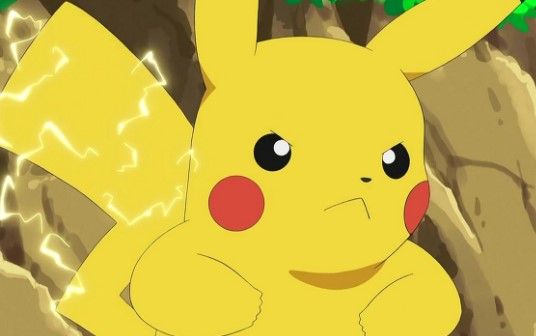
*힘든 싸움이었다...*